Practical 3 Multinomial Logistic Regression (Iris Dataset)

In [26]:
#Loading the libraries and the data
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix , accuracy_score
import matplotlib.pyplot as plt

import statsmodels.api as sm

#for readable figures

pd.set_option('float_format', '{:f}'.format)
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


Multinomial logistic regression with scikit-learn

First of all we assign the predictors and the criterion to each object and split the dataset into a
training and a test part.

In [27]:
x = iris.drop('species', axis=1)
y = iris['species']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

#Fit the model
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

# Model validation
# print the accuracy and error rate:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.93
Error rate: 0.07


In [33]:
 # look at the scores from cross validation:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, trainX, trainY, cv=5,verbose = 1)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.91666667, 0.95833333, 0.95833333, 1.        , 0.95833333])

In [29]:
?cross_val_score

In [30]:
 print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.05)


In [31]:
#look at the confusion matrix:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

[[11  0  0]
 [ 0  6  0]
 [ 0  2 11]]


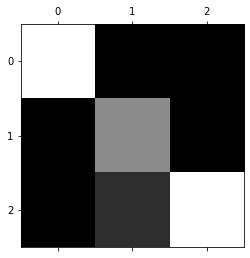

In [32]:
#If you have many variables, it makes sense to plot the confusion matrix:
plt.matshow(confusion_matrix, cmap='gray')
plt.show()

In [40]:
#Calculated probabilities
#get the probabilities of the predicted classes
probability = log_reg.predict_proba(testX)
probability

array([[6.06147412e-09, 1.24523491e-03, 9.98754759e-01],
       [9.45734672e-01, 5.42651634e-02, 1.64454860e-07],
       [9.64874632e-01, 3.51251165e-02, 2.51012965e-07],
       [1.15904404e-02, 8.02515497e-01, 1.85894062e-01],
       [5.45020501e-05, 1.08520836e-01, 8.91424662e-01],
       [8.06328955e-05, 1.00180218e-01, 8.99739149e-01],
       [6.71991318e-06, 2.60285086e-02, 9.73964772e-01],
       [9.69793596e-01, 3.02063221e-02, 8.18388112e-08],
       [9.83035946e-01, 1.69640268e-02, 2.68136115e-08],
       [8.85321095e-07, 1.82326377e-02, 9.81766477e-01],
       [9.57522766e-01, 4.24771089e-02, 1.25056107e-07],
       [9.83950299e-01, 1.60496842e-02, 1.70283696e-08],
       [9.67913705e-07, 2.37539336e-02, 9.76245098e-01],
       [9.70773924e-01, 2.92260352e-02, 4.12049178e-08],
       [9.72676696e-01, 2.73232608e-02, 4.30964974e-08],
       [1.94430765e-04, 1.89529794e-01, 8.10275775e-01],
       [9.74005277e-01, 2.59946987e-02, 2.42521769e-08],
       [1.59035767e-01, 8.38105

In [41]:
#Each column here represents a class. The class with the highest probability is
#the output of the predicted class. Here we can see that the length of the
#probability data is the same as the length of the test data.
print(probability.shape[0])
print(testX.shape[0])

30
30


In [49]:
#output into shape and a readable format
df = pd.DataFrame(log_reg.predict_proba(testX), columns=log_reg.classes_)
df.head()

#with the .classes_ function we get the order of the classes that Python gave.

,setosa,versicolor,virginica
0,0.000000,0.001245,0.998755
1,0.945735,0.054265,0.000000
2,0.964875,0.035125,0.000000
3,0.011590,0.802515,0.185894
4,0.000055,0.108521,0.891425


In [50]:
 #sum of the probabilities must always be 1
df['sum'] = df.sum(axis=1)
df.head()

,setosa,versicolor,virginica,sum
0,0.000000,0.001245,0.998755,1.000000
1,0.945735,0.054265,0.000000,1.000000
2,0.964875,0.035125,0.000000,1.000000
3,0.011590,0.802515,0.185894,1.000000
4,0.000055,0.108521,0.891425,1.000000


In [51]:
# add the predicted classes…
df['predicted_class'] = y_pred
df.head()

,setosa,versicolor,virginica,sum,predicted_class
0,0.000000,0.001245,0.998755,1.000000,virginica
1,0.945735,0.054265,0.000000,1.000000,setosa
2,0.964875,0.035125,0.000000,1.000000,setosa
3,0.011590,0.802515,0.185894,1.000000,versicolor
4,0.000055,0.108521,0.891425,1.000000,virginica


In [12]:
 #actual classes:
df['actual_class'] = testY.to_frame().reset_index().drop(columns='index')
df.head()

,setosa,versicolor,virginica,sum,predicted_class,actual_class
0,0.003408,0.897048,0.099544,1.000000,versicolor,versicolor
1,0.005353,0.809065,0.185581,1.000000,versicolor,versicolor
2,0.985616,0.014384,0.000000,1.000000,setosa,setosa
3,0.000050,0.101739,0.898211,1.000000,virginica,virginica
4,0.959982,0.040018,0.000000,1.000000,setosa,setosa


In [57]:
#do a plausibility check whether the classes were predicted correctly.
le = preprocessing.LabelEncoder()
df['label_pred'] = le.fit_transform(df['predicted_class'])
df['label_actual'] = le.transform(df['actual_class'])
df.head()

,setosa,versicolor,virginica,sum,predicted_class,actual_class,label_pred,label_actual
0,0.000000,0.001245,0.998755,1.000000,virginica,virginica,2,2
1,0.945735,0.054265,0.000000,1.000000,setosa,setosa,0,0
2,0.964875,0.035125,0.000000,1.000000,setosa,setosa,0,0
3,0.011590,0.802515,0.185894,1.000000,versicolor,versicolor,1,1
4,0.000055,0.108521,0.891425,1.000000,virginica,virginica,2,2


In [14]:
#see that the two variables (predicted_class & actual_class) were coded the
#same and can therefore be continued properly.
targets = df['predicted_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{'versicolor': 1, 'setosa': 0, 'virginica': 2}

In [15]:
targets = df['actual_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{'versicolor': 1, 'setosa': 0, 'virginica': 2}

In [16]:
#plausibility check whether the classes were predicted correctly. If the result
#of subtraction is 0, it was a correct estimate of the model.
df['check'] = df['label_actual'] - df['label_pred']
df.head(7)

,setosa,versicolor,virginica,sum,predicted_class,actual_class,label_pred,label_actual,check
0,0.003408,0.897048,0.099544,1.000000,versicolor,versicolor,1,1,0
1,0.005353,0.809065,0.185581,1.000000,versicolor,versicolor,1,1,0
2,0.985616,0.014384,0.000000,1.000000,setosa,setosa,0,0,0
3,0.000050,0.101739,0.898211,1.000000,virginica,virginica,2,2,0
4,0.959982,0.040018,0.000000,1.000000,setosa,setosa,0,0,0
5,0.965842,0.034158,0.000000,1.000000,setosa,setosa,0,0,0
6,0.981573,0.018427,0.000000,1.000000,setosa,setosa,0,0,0


In [17]:
#For better orientation, we give the observations descriptive names and delete
#unnecessary columns.
df['correct_prediction?'] = np.where(df['check'] == 0, 'True', 'False')
df = df.drop(['label_pred', 'label_actual', 'check'], axis=1)
df.head()

,setosa,versicolor,virginica,sum,predicted_class,actual_class,correct_prediction?
0,0.003408,0.897048,0.099544,1.000000,versicolor,versicolor,True
1,0.005353,0.809065,0.185581,1.000000,versicolor,versicolor,True
2,0.985616,0.014384,0.000000,1.000000,setosa,setosa,True
3,0.000050,0.101739,0.898211,1.000000,virginica,virginica,True
4,0.959982,0.040018,0.000000,1.000000,setosa,setosa,True


In [18]:
#use the generated “values” to manually calculate the accuracy again.
true_predictions = df[df["correct_prediction?"] == 'True'].shape[0]
false_predictions = df[(df["correct_prediction?"] == 'False')].shape[0]
total = df["correct_prediction?"].shape[0]
print('manual calculated Accuracy is:', (true_predictions / total * 100))

manual calculated Accuracy is: 96.66666666666667


In [19]:
#take finally a look at the probabilities of the mispredicted classes
wrong_pred = df[(df["correct_prediction?"] == 'False')]
wrong_pred

,setosa,versicolor,virginica,sum,predicted_class,actual_class,correct_prediction?
12,0.000735,0.462141,0.537125,1.000000,virginica,versicolor,False


Multinomial Logit with the statsmodel library

In [59]:
#Multinomial Logit with the statsmodel library
#To get the p-values of the model created above we have to use the statsmodel␣
#library again.
x = iris.drop('species', axis=1)
y = iris['species']
x = sm.add_constant(x, prepend = False)
mnlogit_mod = sm.MNLogit(y, x)
mnlogit_fit = mnlogit_mod.fit()
print (mnlogit_fit.summary())

         Current function value: 0.039662
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Fri, 27 May 2022   Pseudo R-squ.:                  0.9639
Time:                        23:04:40   Log-Likelihood:                -5.9493
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                 7.055e-64
species=versicolor       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
sepal_length          -1.2470    1.9e+05  -6.56e-06      1.000   -3.72e+05    3.72e+05
sepal_width          -14.5547   1.42e+05 

C:\Users\gupta\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


We just showed how the Multinomial Logistic Regression can be used to predict multiple classes.